# **Prediccion del rendimiento academico**

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


In [89]:
df=pd.read_csv('https://raw.githubusercontent.com/fluvwonie/World-/refs/heads/main/basep_limpia2.csv')
df

,Student Name,Student Age,Student year,Father Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Average_Grade
0,Jaclyn Mcneil,14,Year 9,Bachelor,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,72.512281
1,Eric Steele,17,Year 11,PhD,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467,70.027209
2,Carrie Harvey,17,Year 9,PhD,IGCSE,52.064120,75.201754,80.705790,67.390144,78.045191,69.355050,82.103080,71.724884,70.873844,61.598956,70.906281
3,Jon Williamson,17,Year 12,High School,IB,86.643070,76.595939,91.418080,100.000000,86.788439,85.086126,49.695174,58.606972,80.010250,85.636102,80.048015
4,Ashley Rogers,17,Year 12,High School,IGCSE,77.498663,85.989126,67.744520,74.602568,70.193265,66.204522,63.330898,83.232947,81.289702,94.834315,76.492053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,Karen Adams,15,Year 12,High School,Thanweya,93.959985,95.687938,66.221163,85.957726,69.853142,49.664365,81.120650,72.094016,86.982105,83.279837,78.482093
19901,Ashley Jones,15,Year 12,High School,IGCSE,72.238773,84.319553,65.463763,74.027376,100.000000,54.575907,65.364967,68.180580,70.670648,59.727755,71.456932
19902,Jeanette Hampton,14,Year 9,PhD,Thanweya,41.352071,71.002146,73.500337,66.110988,78.279975,76.200527,64.578739,100.000000,94.840855,77.325211,74.319085
19903,Madeline Craig,17,Year 10,Master,IB,66.034573,62.075037,64.595721,78.087032,37.271821,100.000000,69.532722,76.904227,71.885394,64.706900,69.109343


In [90]:


# Preparación inicial: Separar las características y la variable objetivo
target = 'Average_Grade'
categorical_columns = ['Student year', 'Father Degree', 'Education Type']


In [91]:
# Codificar variables categóricas
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])



In [92]:
# Separar las variables predictoras (X) y la objetivo (y)
X = df.drop(columns=['Student Name', target])  # Excluir el nombre del estudiante y la variable objetivo
y = df[target]

In [93]:

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()


(       Student Age  Student year  Father Degree  Education Type  Subject_1  \
 11387           14             1              2               2  65.010854   
 13611           14             2              0               0  81.130965   
 9639            18             1              2               2  59.831672   
 6389            16             3              1               2  60.767487   
 664             17             0              1               2  82.272240   
 
        Subject_2  Subject_3   Subject_4  Subject_5  Subject_6  Subject_7  \
 11387  89.868695  84.663048  100.000000  93.666098  94.538260  93.956288   
 13611  57.592092  56.788232   61.989218  64.700351  67.848071  75.868380   
 9639   73.631310  61.442064   72.734982  78.267454  64.954200  74.248515   
 6389   52.263592  67.828425   80.727926  69.184381  80.551642  77.048687   
 664    86.785630  73.097587   83.944685  79.258456  78.669466  83.796634   
 
        Subject_8  Subject_9  Subject_10  
 11387  68.067512

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar un modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(np.float64(1.510935153949763e-28), 1.0)

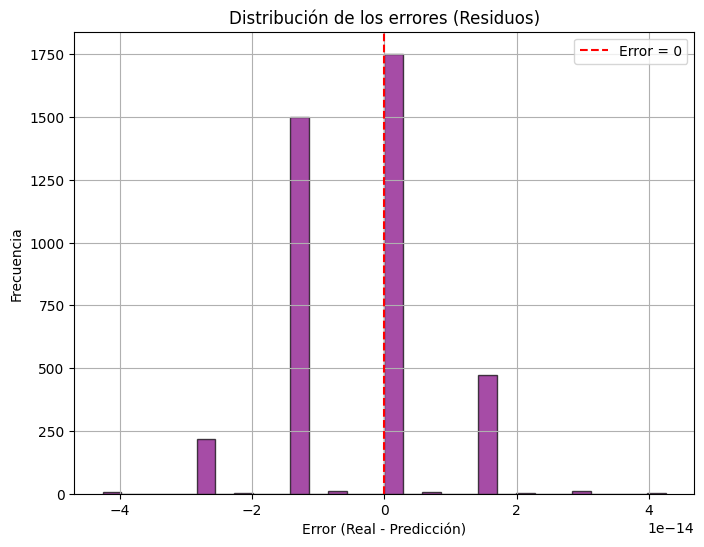

In [95]:
# Calcular los errores (residuos)
errors = y_test - y_pred

# Gráfico: Histograma de errores
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribución de los errores (Residuos)')
plt.xlabel('Error (Real - Predicción)')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--', label='Error = 0')
plt.legend()
plt.grid(True)
plt.show()


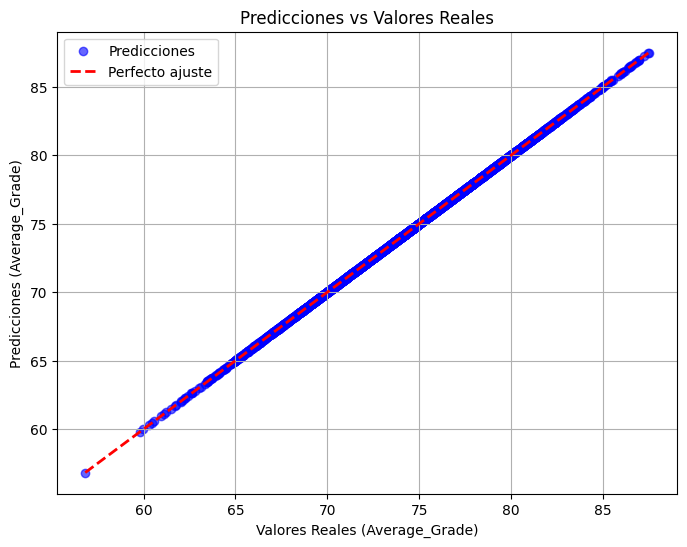

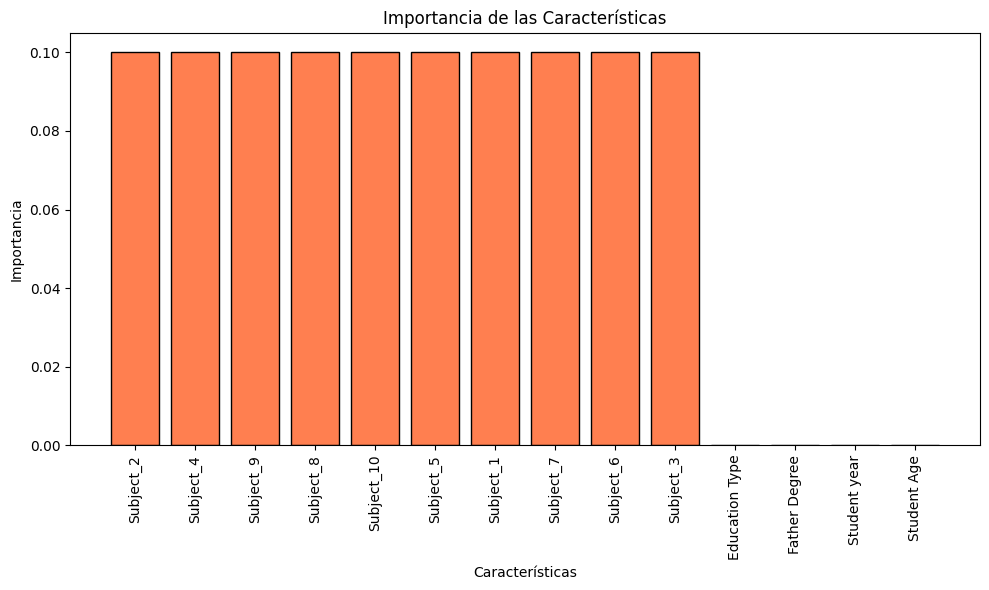

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Gráfico: Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfecto ajuste')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales (Average_Grade)')
plt.ylabel('Predicciones (Average_Grade)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico: Importancia de las características (para Random Forest o modelos similares)
if hasattr(linear_model, "feature_importances_"):  # Para Random Forest, Gradient Boosting, etc.
    importances = linear_model.feature_importances_
    feature_names = X.columns
else:
    importances = np.abs(linear_model.coef_)  # Para modelos lineales
    feature_names = X.columns

# Ordenar características por importancia
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center', color='coral', edgecolor='black')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title('Importancia de las Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()


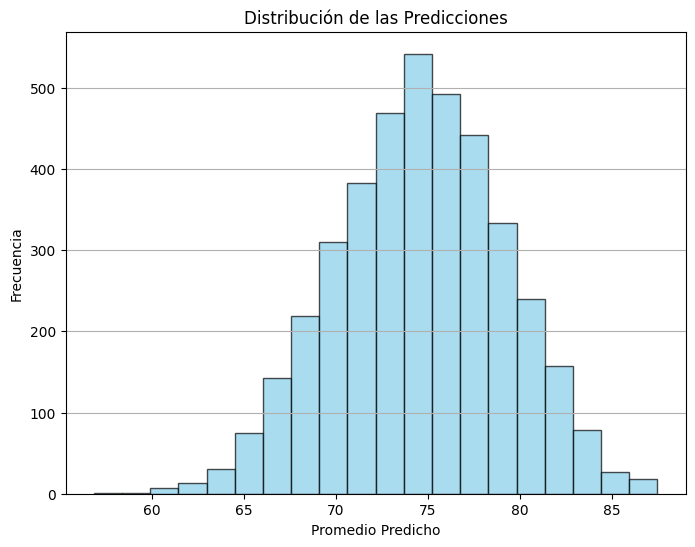

In [97]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de las Predicciones')
plt.xlabel('Promedio Predicho')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()


In [98]:
df.columns 

Index(['Student Name', 'Student Age', 'Student year', 'Father Degree',
       'Education Type', 'Subject_1', 'Subject_2', 'Subject_3', 'Subject_4',
       'Subject_5', 'Subject_6', 'Subject_7', 'Subject_8', 'Subject_9',
       'Subject_10', 'Average_Grade'],
      dtype='object')

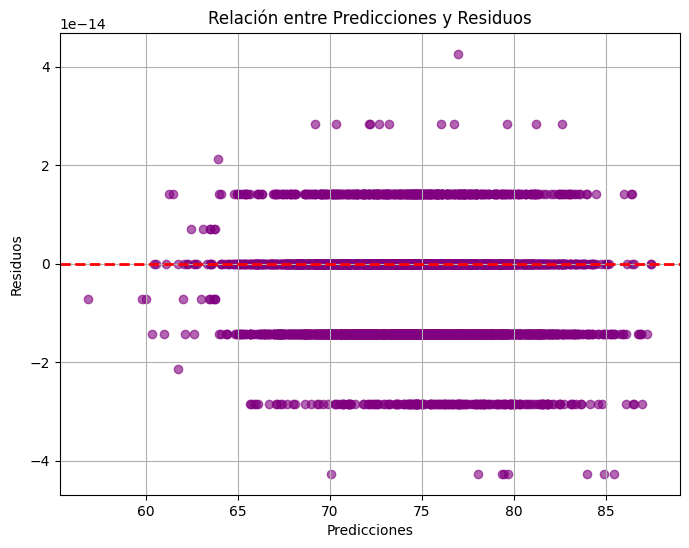

In [99]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Relación entre Predicciones y Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


# **Analisis del rendimiento academico**

In [100]:
print(len(y_pred))  # Longitud de las predicciones
print(len(y_test))  # Longitud de los datos de prueba


3981
3981


In [101]:
# Asegúrate de que solo aplicas la categorización a los datos de prueba
df_test = df.iloc[X_test.index]  # Filtrar las filas correspondientes al conjunto de prueba
df_test['Prediccion_Rendimiento'] = [categorize_performance(pred) for pred in y_pred]

# Ver la distribución de las categorías en el conjunto de prueba
df_test['Prediccion_Rendimiento'].value_counts()
# Filtrar las filas correspondientes al conjunto de prueba



C:\Users\fatis\AppData\Local\Temp\ipykernel_36024\3540712397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediccion_Rendimiento'] = [categorize_performance(pred) for pred in y_pred]


Prediccion_Rendimiento
Rendimiento medio    3492
Alto rendimiento      486
Bajo rendimiento        3
Name: count, dtype: int64

In [102]:
 
y_pred_all = linear_model.predict(X)


def categorize_performance(pred):
    if pred >= 80:
        return 'Alto rendimiento'
    elif pred >= 60:
        return 'Rendimiento medio'
    else:
        return 'Bajo rendimiento'

# Aplicar categorización a las predicciones
df['Prediccion_Rendimiento'] = [categorize_performance(pred) for pred in y_pred_all]

# Revisar distribución por categorías
df['Prediccion_Rendimiento'].value_counts()


Prediccion_Rendimiento
Rendimiento medio    17496
Alto rendimiento      2393
Bajo rendimiento        16
Name: count, dtype: int64

In [103]:
df.describe()

,Student Age,Student year,Father Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Average_Grade
count,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000
mean,16.013112,1.499071,1.495303,0.990304,74.808274,74.659830,74.758457,74.684443,74.546859,74.606928,74.643082,74.717301,74.611436,74.622357,74.665897
std,1.419383,1.120687,1.128273,0.816306,14.306844,14.394417,14.343153,14.357472,14.313961,14.478326,14.309772,14.356007,14.339691,14.392117,4.548506
min,14.000000,0.000000,0.000000,0.000000,23.115667,20.000000,20.349550,20.000000,20.000000,20.000000,20.000000,20.000000,22.138571,20.000000,56.828646
25%,15.000000,0.000000,0.000000,0.000000,65.014776,64.681109,64.957556,64.820113,64.764062,64.571818,64.894052,64.929650,64.864705,64.806270,71.633602
50%,16.000000,2.000000,1.000000,1.000000,75.203647,74.933277,75.158071,74.922937,74.792238,74.940232,75.064479,74.905103,74.927116,74.898820,74.715419
75%,17.000000,3.000000,3.000000,2.000000,85.078180,85.127583,85.104333,85.169067,85.017868,85.164677,84.865026,85.101369,85.012114,84.933925,77.760831
max,18.000000,3.000000,3.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,91.548275


In [104]:
df

,Student Name,Student Age,Student year,Father Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Average_Grade,Prediccion_Rendimiento
0,Jaclyn Mcneil,14,3,0,0,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,72.512281,Rendimiento medio
1,Eric Steele,17,1,3,1,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467,70.027209,Rendimiento medio
2,Carrie Harvey,17,3,3,1,52.064120,75.201754,80.705790,67.390144,78.045191,69.355050,82.103080,71.724884,70.873844,61.598956,70.906281,Rendimiento medio
3,Jon Williamson,17,2,1,0,86.643070,76.595939,91.418080,100.000000,86.788439,85.086126,49.695174,58.606972,80.010250,85.636102,80.048015,Alto rendimiento
4,Ashley Rogers,17,2,1,1,77.498663,85.989126,67.744520,74.602568,70.193265,66.204522,63.330898,83.232947,81.289702,94.834315,76.492053,Rendimiento medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,Karen Adams,15,2,1,2,93.959985,95.687938,66.221163,85.957726,69.853142,49.664365,81.120650,72.094016,86.982105,83.279837,78.482093,Rendimiento medio
19901,Ashley Jones,15,2,1,1,72.238773,84.319553,65.463763,74.027376,100.000000,54.575907,65.364967,68.180580,70.670648,59.727755,71.456932,Rendimiento medio
19902,Jeanette Hampton,14,3,3,2,41.352071,71.002146,73.500337,66.110988,78.279975,76.200527,64.578739,100.000000,94.840855,77.325211,74.319085,Rendimiento medio
19903,Madeline Craig,17,0,2,0,66.034573,62.075037,64.595721,78.087032,37.271821,100.000000,69.532722,76.904227,71.885394,64.706900,69.109343,Rendimiento medio


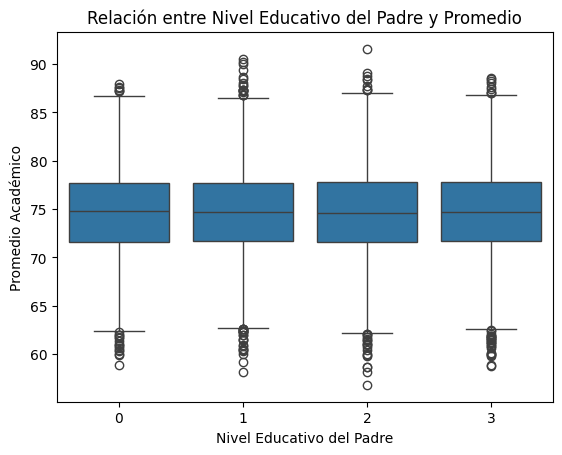

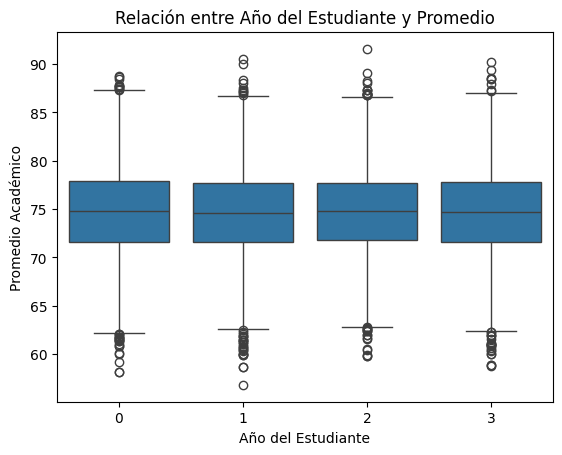

In [105]:
import seaborn as sns

# Comparar el nivel educativo del padre con el rendimiento
sns.boxplot(x='Father Degree', y='Average_Grade', data=df)
plt.title('Relación entre Nivel Educativo del Padre y Promedio')
plt.xlabel('Nivel Educativo del Padre')
plt.ylabel('Promedio Académico')
plt.show()

# Comparar rendimiento por año del estudiante
sns.boxplot(x='Student year', y='Average_Grade', data=df)
plt.title('Relación entre Año del Estudiante y Promedio')
plt.xlabel('Año del Estudiante')
plt.ylabel('Promedio Académico')
plt.show()


# Que variables afectan hipoteticamente con el rendimineto academico?

In [ ]:
# Simulación de un cambio hipotético
new_data = X_test.copy()
new_data['Father Degree'] = 3 # Supongamos que incrementamos el nivel educativo del padre
simulated_predictions = linear_model.predict(new_data)

# Comparar promedios antes y después del cambio
print(f"Promedio original: {y_pred.mean()}")
print(f"Promedio simulado: {simulated_predictions.mean()}")



Promedio original: 74.57589489269695
Promedio simulado: 74.57589489269695


In [ ]:
# Guardar el DataFrame con las predicciones en un archivo CSV
df.to_csv('predicciones_rendimiento.csv', index=False)
